In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pl
from plot_functions import *
from importlib import reload  
import sys
sys.path.append("/home/mlparker/programs/python_modules/plotting_functions/")
from step_plots import *
from matplotlib.ticker import *


C1='#D81B60'
C2='#1E88E5'
C3='#FFC107'
C4='#135247'
colors=[C1,C2,C3,C4]

In [16]:
def mutoi(mu):
    i=  np.arccos(mu)/2/np.pi*360
    return i

In [35]:
datafile="simulated_spectra_2/athena_hybrid/fits_relxill_3to10.dat"
data=pd.read_csv(datafile)

data["i"]=mutoi(data["mu"])
data["delta_a"]=data["fit_a"]-data["a"]
data["delta_i"]=data["fit_i"]-data["i"]
# data["delta_h"]=data["fit_h"]-data["h"]
data["delta_A"]=data["fit_Afe"]-data["Afe"]
data['redchi']=data['chi2']/data['dof']

# highspin_data=data[data["a"]==0.98]
# print

# big_a_diff=data[abs(data['delta_a'])>0.5]
# print(big_a_diff[['fit_a','a']])
print(data.shape[0])

clean_data=data[data['redchi']<1.4]
dirty_data=data[data['redchi']>1.4]
print(clean_data.shape[0],dirty_data.shape[0])

1000
907 93


0.21953376312002323


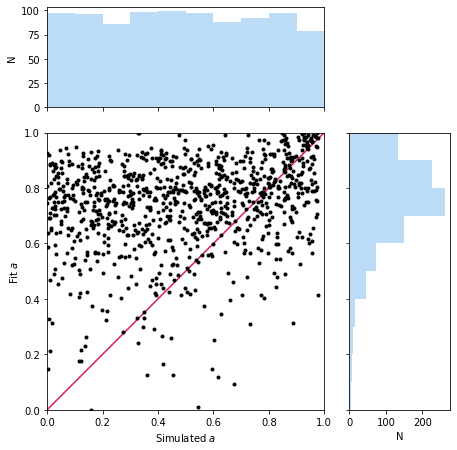

In [27]:
spin_plot(clean_data)
print(clean_data.corr()['a']['fit_a'])
pl.savefig('figures/param_recovery/athenahybrid_ref_a.pdf',bbox_inches='tight')

0.21221725979027714


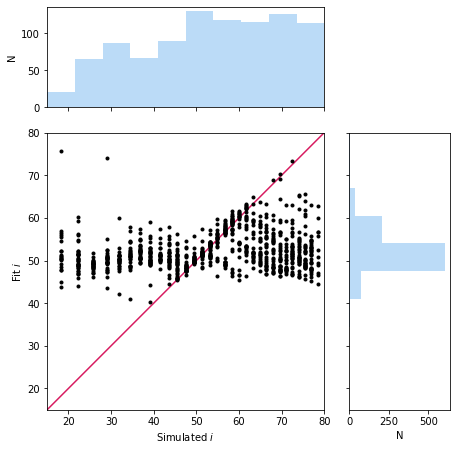

In [28]:
inc_plot(clean_data)
print(clean_data.corr()['i']['fit_i'])
pl.savefig('figures/param_recovery/athenahybrid_ref_i.pdf',bbox_inches='tight')

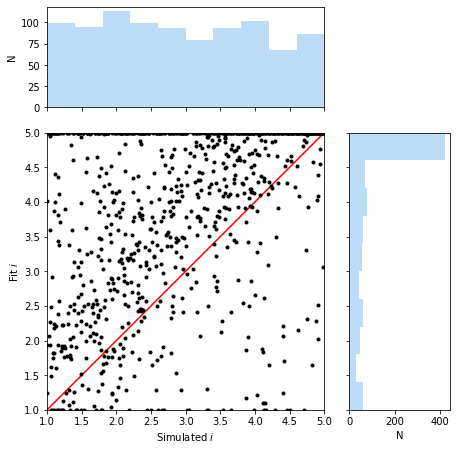

In [29]:
Afe_plot(clean_data)
clean_data.corr()['Afe']['fit_Afe']
pl.savefig('figures/param_recovery/athenahybrid_ref_Afe.pdf',bbox_inches='tight')


### Sample clean data, plot 10 spectra

In [30]:
clean_sample=clean_data.sample(8)

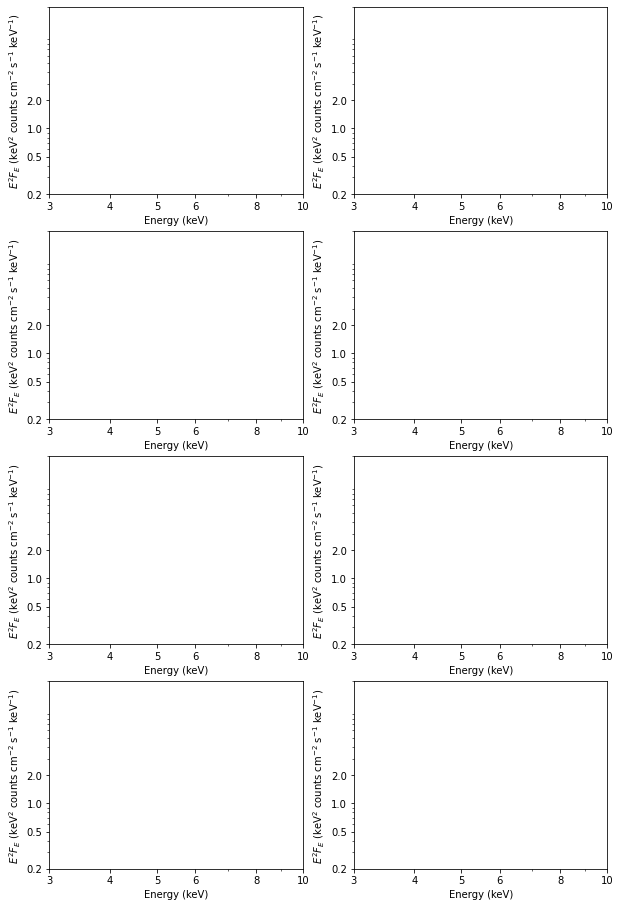

In [31]:
fig=pl.figure(figsize=(10,20),facecolor='w')
escale=2

for j,i in enumerate(clean_sample.index):
#     print(520+j+1)
    ax=pl.subplot(520+j+1)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(3,10)
    ax.set_ylim(0.2,20)
    
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_formatter(ScalarFormatter())
    ax.xaxis.set_major_locator(FixedLocator([3,4,5,6,8,10]))
    ax.tick_params(which='minor',labelbottom=False)
    ax.set_xlabel('Energy (keV)')
    
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(ScalarFormatter())
    ax.yaxis.set_major_locator(FixedLocator([0.2,0.5,1,2]))
    ax.tick_params(which='minor',labelleft=False)
    ax.set_ylabel(r"$E^2 F_E$ (keV$^2$ counts cm$^{-2}$ s$^{-1}$ keV$^{-1}$)")
    
    spectrum=pd.read_csv('simulated_spectra_2/athena_hybrid/spectrum_%s.csv' % str(i))
    
    pl.errorbar(spectrum['x'],\
                spectrum['y']*spectrum['x']**escale,\
                spectrum['yerr']*spectrum['x']**escale,\
                spectrum['xerr'],\
                ls='none',color='k',lw=1,alpha=0.5)
    
    step_plot(spectrum['x'],\
              spectrum['model']*spectrum['x']**escale,\
              spectrum['xerr'],\
              color=C1,lw=1)
    
pl.savefig('figures/spectra/clean_spectra_athena.pdf',bbox_inches='tight')

In [36]:
dirty_sample=dirty_data.sample(8)

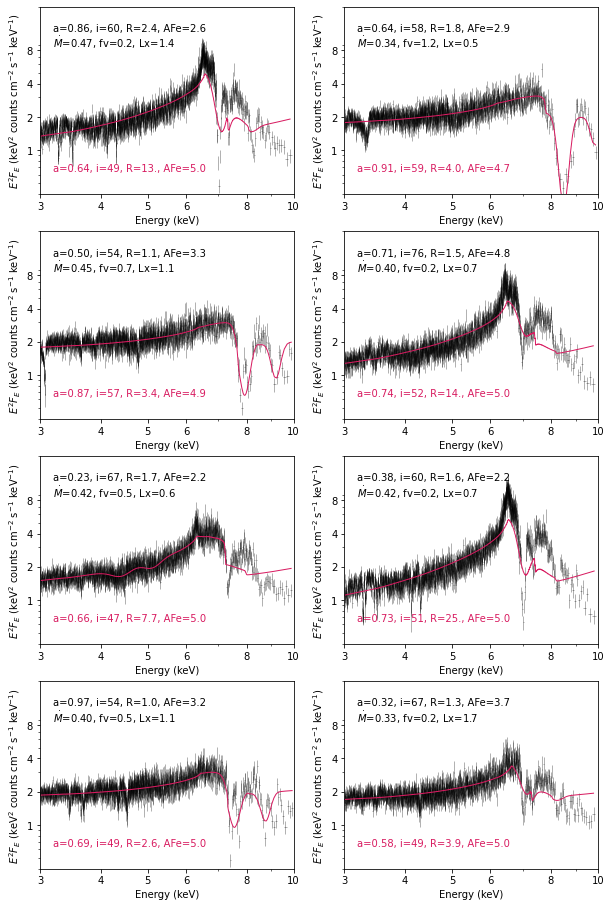

In [44]:
fig=pl.figure(figsize=(10,20),facecolor='w')
escale=2
fscale=1000

for j,fname in enumerate(dirty_sample["filename"]):
# for j,i in enumerate(dirty_sample.index):
#     print(520+j+1)
    ax=pl.subplot(520+j+1)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(3,10)
    ax.set_ylim(0.4,20)
    
    i=fname.split('_')[1]
    
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_formatter(ScalarFormatter())
    ax.xaxis.set_major_locator(FixedLocator([3,4,5,6,8,10]))
    ax.tick_params(which='minor',labelbottom=False)
    ax.set_xlabel('Energy (keV)')
    
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(ScalarFormatter())
    ax.yaxis.set_major_locator(FixedLocator([1,2,4,8]))
    ax.tick_params(which='minor',labelleft=False)
    ax.set_ylabel(r"$E^2 F_E$ (keV$^2$ counts cm$^{-2}$ s$^{-1}$ keV$^{-1}$)")
    
    spectrum=pd.read_csv('simulated_spectra_2/athena_hybrid/spectrum_%s.csv' % str(i))
    
    pl.errorbar(spectrum['x'],\
                spectrum['y']*fscale*spectrum['x']**escale,\
                spectrum['yerr']*fscale*spectrum['x']**escale,\
                spectrum['xerr'],\
                ls='none',color='k',lw=1,alpha=0.3)
    
    pl.plot(spectrum['x'],\
              spectrum['model']*fscale*spectrum['x']**escale,\
              # spectrum['xerr'],\
              color=C1,lw=1)
    
    
    a=(float((dirty_sample.loc[dirty_sample['filename']==fname]['fit_a'])))
    R=(float((dirty_sample.loc[dirty_sample['filename']==fname]['fit_h'])))
    AFe=(float((dirty_sample.loc[dirty_sample['filename']==fname]['fit_Afe'])))
    inc=(float((dirty_sample.loc[dirty_sample['filename']==fname]['fit_i'])))
    ref_pars='a=%s, i=%s, R=%s, AFe=%s' % (str(a)[:4], str(inc)[:2],str(R)[:3],str(AFe)[:3]) 
    ax.text(0.05,0.12,ref_pars,transform=ax.transAxes,color=C1)
    
    a=(float((dirty_sample.loc[dirty_sample['filename']==fname]['a'])))
    R=(float((dirty_sample.loc[dirty_sample['filename']==fname]['R'])))
    AFe=(float((dirty_sample.loc[dirty_sample['filename']==fname]['Afe'])))
    inc=(float((dirty_sample.loc[dirty_sample['filename']==fname]['i'])))
    ref_pars=r'a=%s, i=%s, R=%s, AFe=%s' % (str(a)[:4], str(inc)[:2],str(R)[:3],str(AFe)[:3]) 
    ax.text(0.05,0.87,ref_pars,transform=ax.transAxes,color='k')
    
    
    mdot=(float((dirty_sample.loc[dirty_sample['filename']==fname]['mdot'])))
    fv=(float((dirty_sample.loc[dirty_sample['filename']==fname]['fv'])))
    Lx=(float((dirty_sample.loc[dirty_sample['filename']==fname]['lx'])))
    dw_pars=r'$\dot{M}$=%s, fv=%s, Lx=%s' % (str(mdot)[:4], str(fv)[:3],str(Lx)[:3])
    ax.text(0.05,0.78,dw_pars,transform=ax.transAxes,color='k')
    
pl.savefig('figures/spectra/dirty_spectra_athena.pdf',bbox_inches='tight')

### Iterate through columns of DF, for each plot histogram of distribution for clean and dirty samples

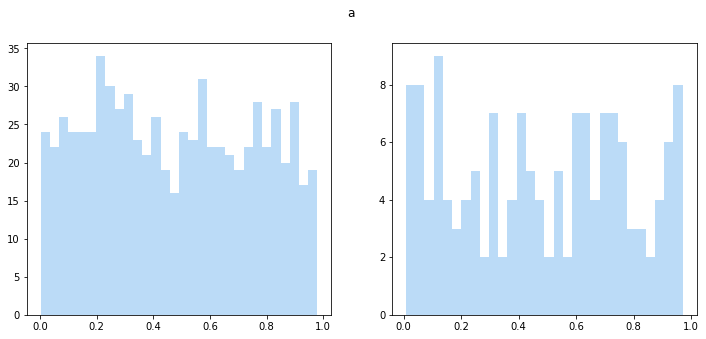

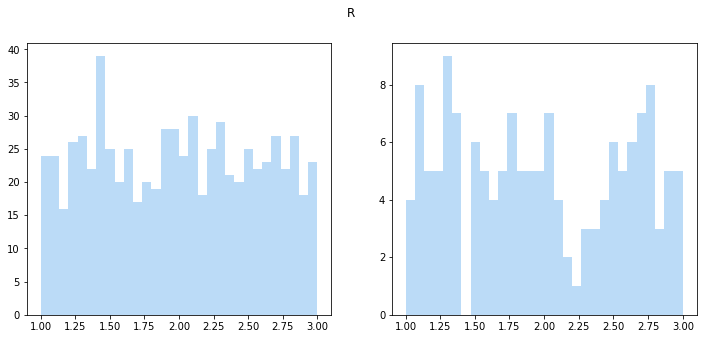

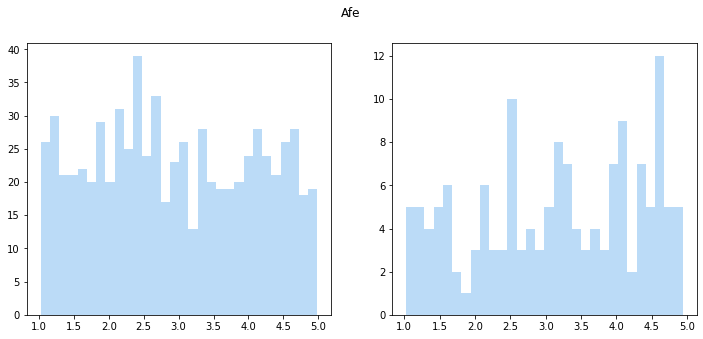

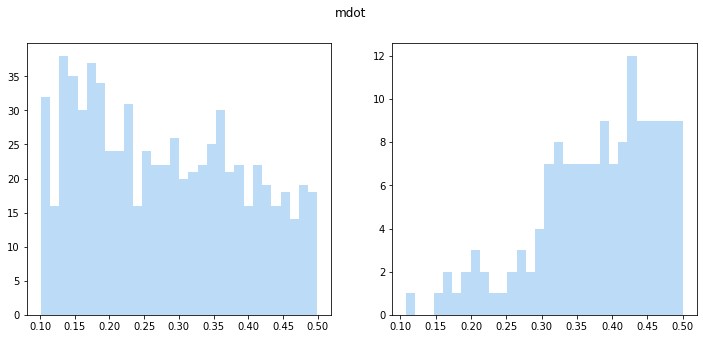

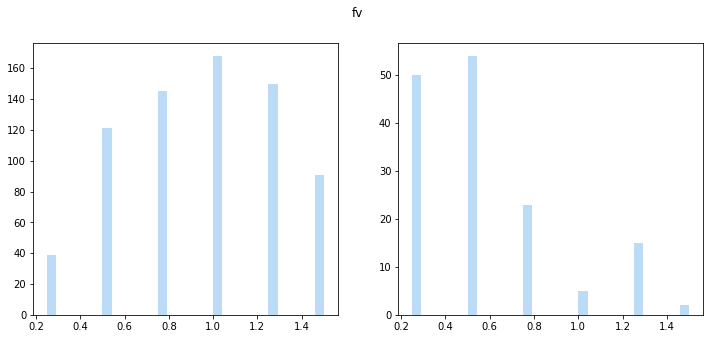

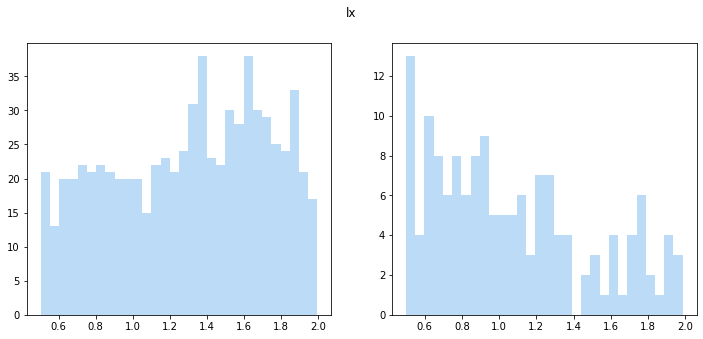

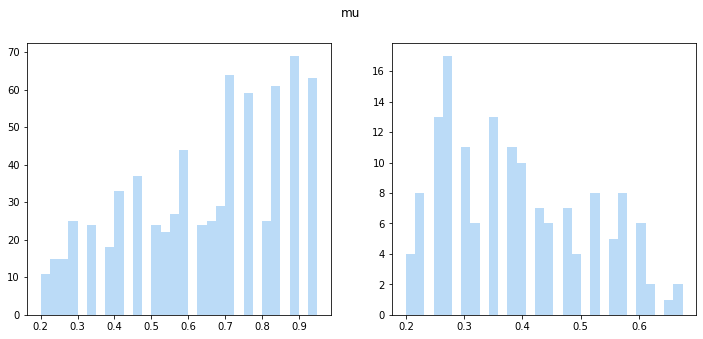

In [27]:
for c in ['a','R','Afe','mdot','fv','lx','mu']:
    fig=pl.figure(figsize=(12,5),facecolor='w')
    fig.suptitle(c)
    ax1=pl.subplot(121)
    h1=pl.hist(clean_data[c],bins=30,color=C2,alpha=0.3)
    ax2=pl.subplot(122)
    h2=pl.hist(dirty_data[c],bins=30,color=C2,alpha=0.3)
    
    

### Find overlap between reflection and disk wind fits

In [36]:
dw_datafile="simulated_spectra_2/xmm_hybrid/fits_dw_3to10.dat"
dw_data=pd.read_csv(dw_datafile)

dw_data['redchi']=dw_data['chi2']/dw_data['dof']

clean_dw_data=dw_data[dw_data['redchi']<1.5]
dirty_dw_data=dw_data[dw_data['redchi']>2]

overlap = pd.merge(clean_dw_data, clean_data, how='inner', on=['filename'])
print(overlap.shape[0])

bad_overlap=pd.merge(dirty_dw_data, dirty_data, how='inner', on=['filename'])
print(bad_overlap.shape[0])

420
9
